In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\study material\projects\datasets\ML ALGO PROJECTS\diabetes dataset\diabetes.csv")

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

## Feature Selection Techniques

In [6]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [7]:
x = df.iloc[:,:-1]
y = df["Outcome"]

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression()

In [10]:
fs = SequentialFeatureSelector(lr,k_features=5,forward=True)
fs.fit(x,y)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(5, 5),
                          scoring='accuracy')

In [11]:
fs.feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [12]:
fs.k_feature_names_

('Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age')

fs.k_score_

## Train Test Split

In [13]:
input_data = df.iloc[:,:-1]
input_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
output_data = df["Outcome"]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train , y_train , x_test , y_test = train_test_split(input_data,output_data, test_size=0.25)

In [17]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
137,0,93,60,25,92,28.7,0.532,22
548,1,164,82,43,67,32.8,0.341,50
261,3,141,0,0,0,30.0,0.761,27
110,3,171,72,33,135,33.3,0.199,24
104,2,85,65,0,0,39.6,0.930,27
...,...,...,...,...,...,...,...,...
299,8,112,72,0,0,23.6,0.840,58
730,3,130,78,23,79,28.4,0.323,34
451,2,134,70,0,0,28.9,0.542,23
255,1,113,64,35,0,33.6,0.543,21


In [18]:
x_test

137    0
548    0
261    1
110    1
104    0
      ..
299    0
730    1
451    1
255    1
181    0
Name: Outcome, Length: 576, dtype: int64

## Regression Analysis

#### simple linear regression (y = mx + c)

In [19]:
dt = pd.read_csv(r"C:\Users\User\Desktop\study material\projects\datasets\ML ALGO PROJECTS\placment\placement.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
x = dt[["cgpa"]]
y = dt["package"]

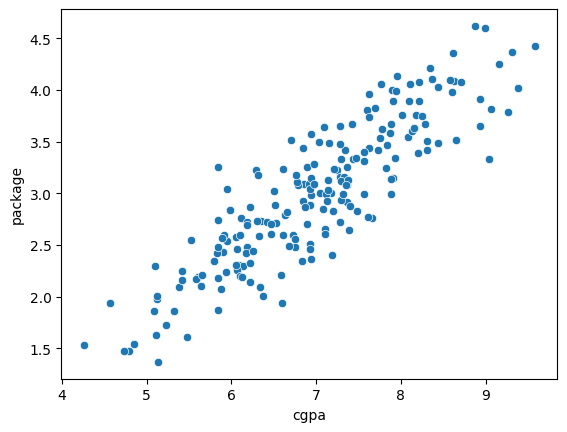

In [21]:
sns.scatterplot(x= "cgpa", y = "package", data=dt)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train , x_test , y_train , y_test =  train_test_split(x,y,test_size=0.3, random_state = 50)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [26]:
z = lr.predict([[5.5]])
print(f"the predicted value is {z}")

the predicted value is [2.13699508]


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
lr.score(x_test, y_test)

0.7978304471604032

In [28]:
lr.coef_             # value of m

array([0.5723615])

In [29]:
lr.intercept_        # value of c

-1.0109931850802414

In [30]:
y_prd = lr.predict(x)

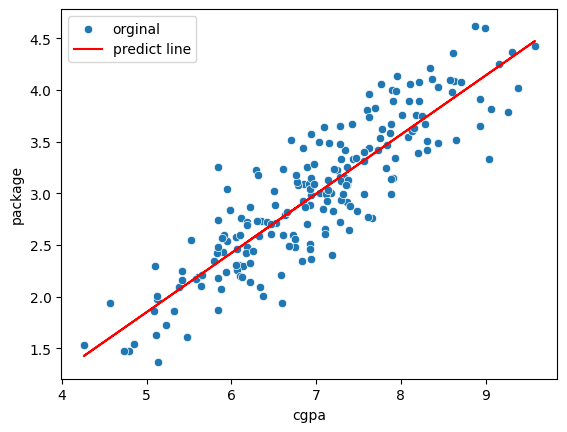

In [31]:
sns.scatterplot(x= "cgpa", y = "package", data=dt)
plt.plot(dt["cgpa"], y_prd , c= "red")
plt.legend(["orginal","predict line"])
plt.show()

#### Multiple Linear Regression          (y = m1x1 + m2x2 .... +c)

In [32]:
dj = pd.read_csv(r"C:\Users\User\Desktop\study material\projects\datasets\ML ALGO PROJECTS\placment\salary.csv")
dj.head(5)

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [33]:
dj.isna().sum()

age           0
experience    0
income        0
dtype: int64

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


[]

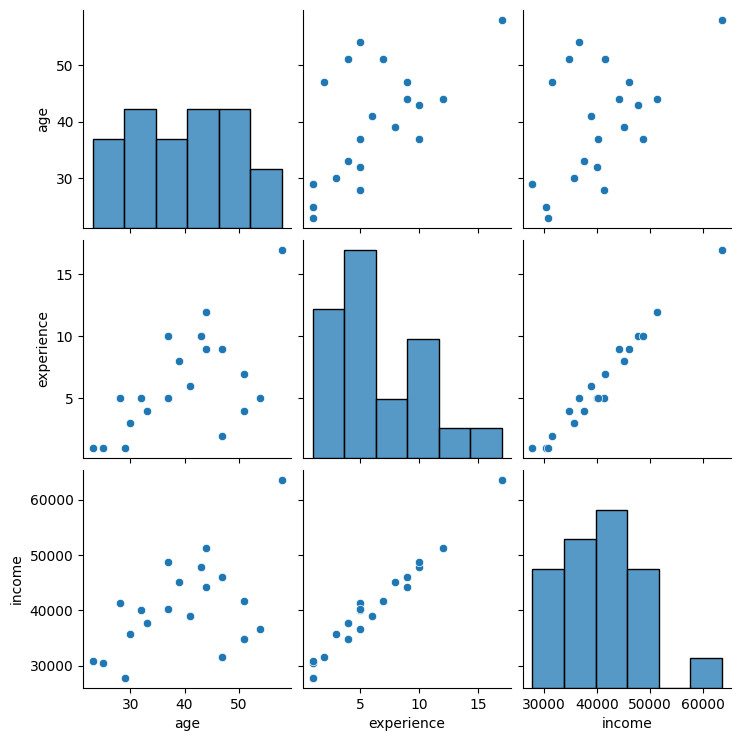

In [34]:
sns.pairplot(data=dj)
plt.plot()

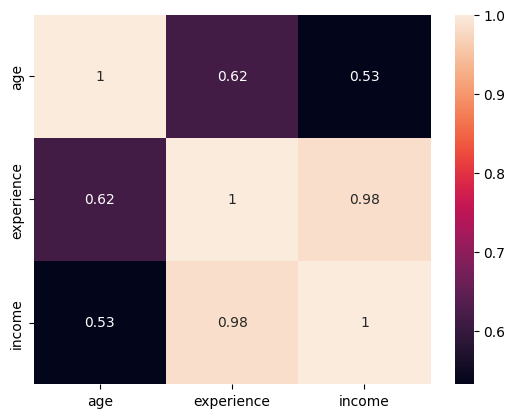

In [35]:
sns.heatmap(data=dj.corr(),annot = True )
plt.show()

In [36]:
x = dj.iloc[:,:-1]
y = dj["income"]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train , x_test , y_train , y_test =  train_test_split(x,y,test_size=0.3, random_state = 50)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

lr.score(x_test,y_test)

In [41]:
lr.coef_

array([ -92.85977305, 2189.14809555])

In [42]:
lr.intercept_

30882.07546340501

In [43]:
lr.predict(x_test)

array([40209.71334165, 38392.0043383 , 44773.72907886, 46498.57830916,
       38856.30320355, 49337.74481606])

#### Regularization

In [44]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

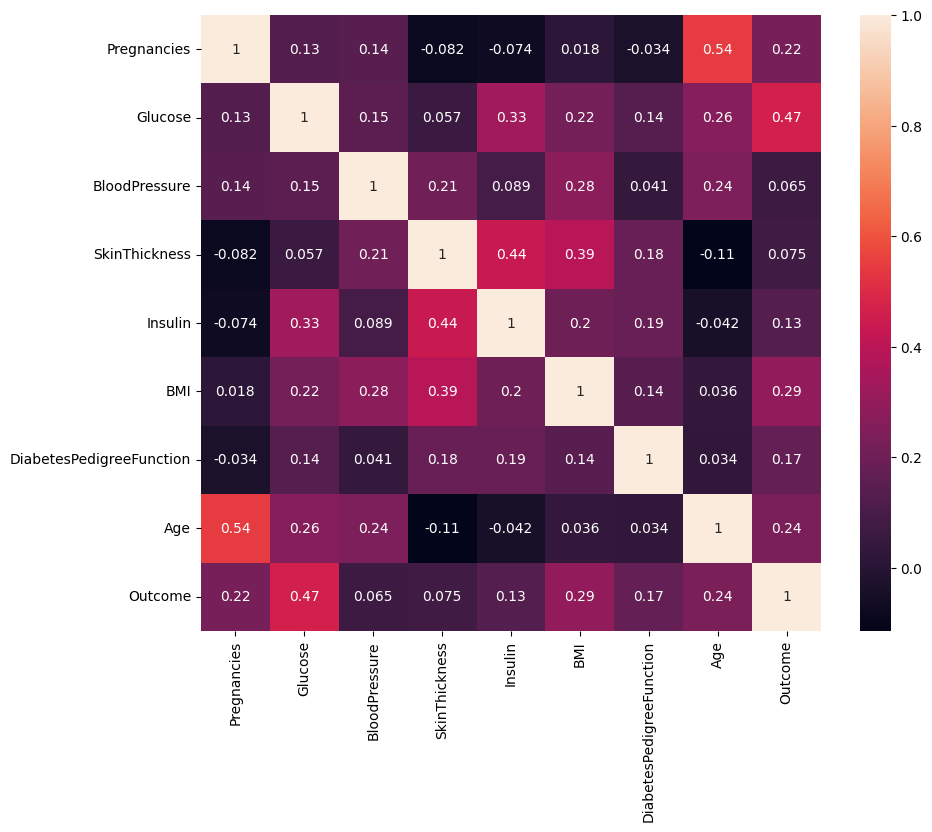

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot = True)
plt.show()

In [47]:
x = df.iloc[:,:-1]
y = df["Outcome"]

In [48]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns = x.columns)

In [49]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [50]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge

In [51]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

#### Linear Regression

In [52]:
lr.score(x_test, y_test)

0.2550028117674177

In [53]:
lr.coef_

array([ 0.03525038,  0.18000138, -0.04412242,  0.00848254, -0.03203368,
        0.11848984,  0.03684049,  0.07592476])

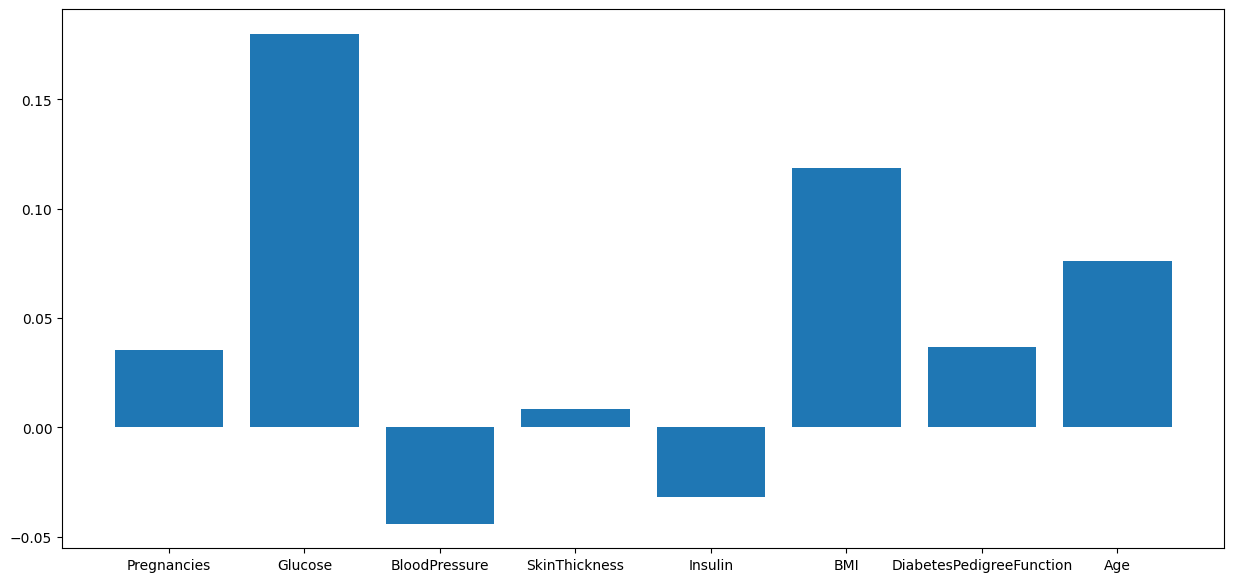

In [54]:
plt.figure(figsize=(15,7))
plt.bar(x.columns, lr.coef_)
plt.show()

#### Lasso Regularization

In [55]:
la = Lasso(alpha=10)
la.fit(x_train , y_train)
la.score(x_test,y_test)*100


-0.045647404452320295

In [56]:
la.coef_

array([0., 0., 0., 0., 0., 0., 0., 0.])

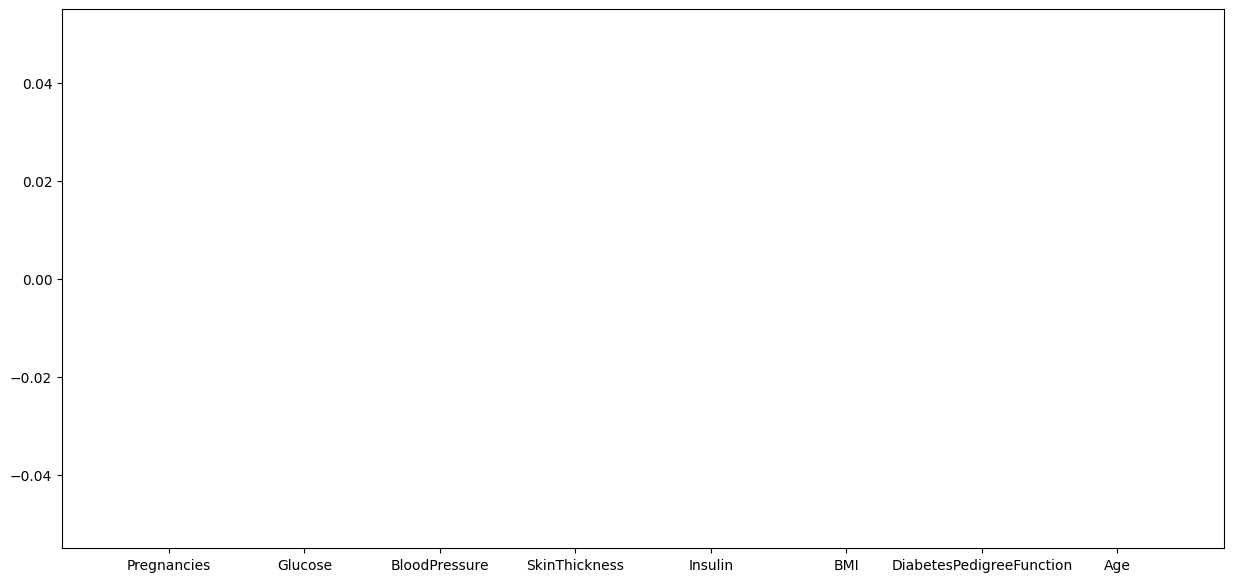

In [57]:
plt.figure(figsize=(15,7))
plt.bar(x.columns, la.coef_)
plt.show()

#### Ridge Regularization

In [58]:
ri =  Ridge(alpha=10)
ri.fit(x_train , y_train)
ri.score(x_test,y_test)*100


25.670028176055183

In [59]:
ri.coef_

array([ 0.03550003,  0.17677741, -0.04220426,  0.00776408, -0.02996953,
        0.11660286,  0.03668891,  0.0749528 ])

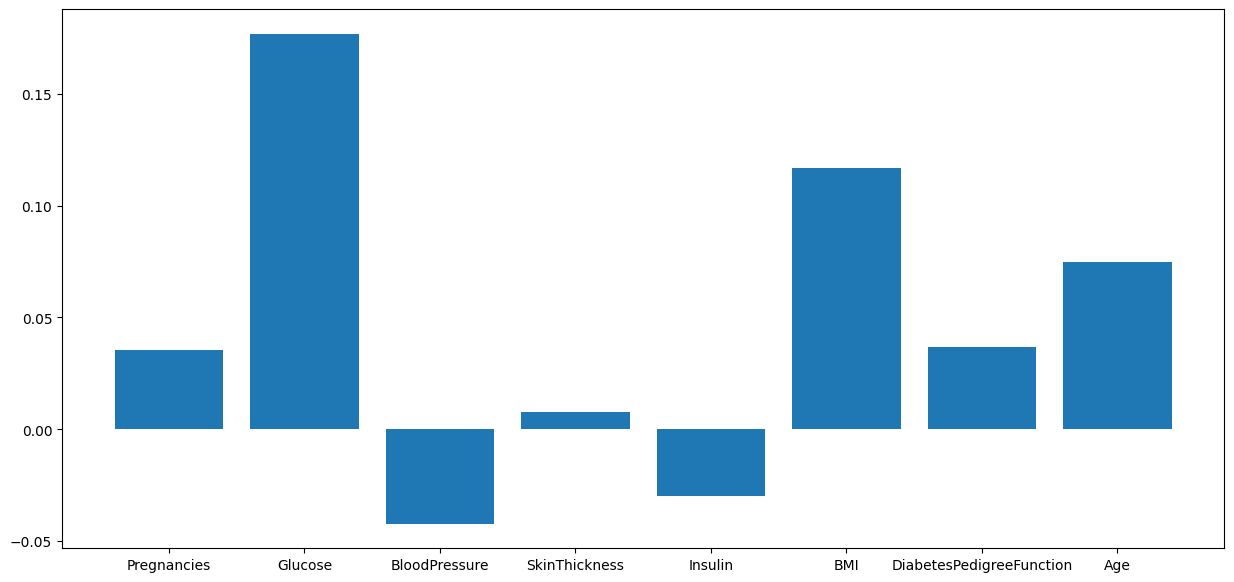

In [60]:
plt.figure(figsize=(15,7))
plt.bar(x.columns, ri.coef_)
plt.show()

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [62]:
mean_squared_error(y_test, lr.predict(x_test))

0.171045272808501

In [63]:
mean_absolute_error(y_test, lr.predict(x_test))

0.3481282599992823

## Classification

### Logistic Regression (Binary Classification - Single input)

In [64]:
dt = pd.read_csv(r"C:\Users\User\Desktop\study material\projects\datasets\ML ALGO PROJECTS\social.csv")
dt.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [65]:
dt.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [66]:
dt.drop_duplicates()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [67]:
dn = dt[['Age', 'Purchased']]

In [68]:
dn

,Age,Purchased
0,19,0
1,35,0
2,26,0
3,27,0
4,19,0
...,...,...
395,46,1
396,51,1
397,50,1
398,36,0


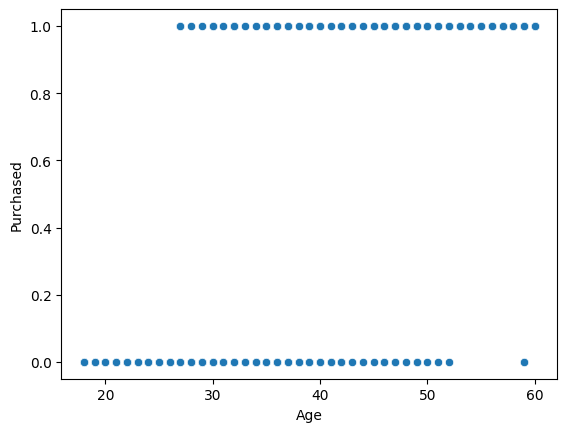

In [69]:
sns.scatterplot(x="Age",y="Purchased", data=dn)
plt.show()

In [70]:
x= dn[["Age"]]
y = dn["Purchased"]

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

In [73]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [74]:
lr.score(x_test,y_test)

0.9125

In [75]:
lr.predict([[40]])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [76]:
lr.predict([[51]])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

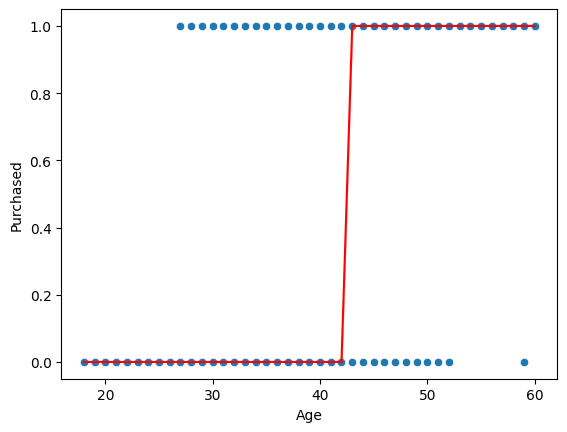

In [77]:
sns.scatterplot(x="Age",y="Purchased", data=dn)
sns.lineplot(x= "Age", y= lr.predict(x) , data=dn , color = "red")
plt.show()

### Logistic Regression (Binary Classification - Multiple input)

In [78]:
dt.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [79]:
x = dt[["Age","EstimatedSalary"]]
y = dt["Purchased"]

In [80]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

In [81]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [82]:
lr.score(x_test,y_test)

0.65

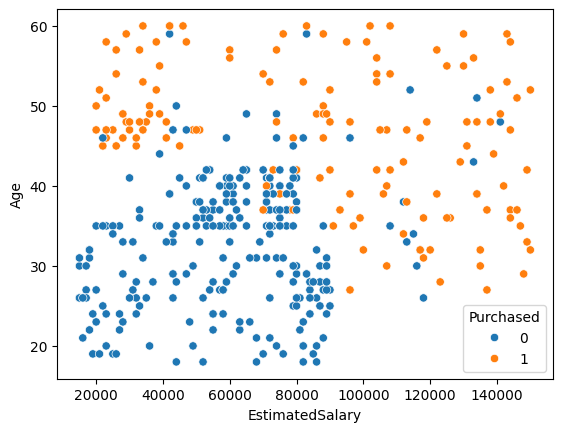

In [83]:
sns.scatterplot(x="EstimatedSalary",y="Age",hue="Purchased", data=dt)
plt.show()

In [84]:
lr.predict([[19,19000]])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [85]:
lr.predict([[46,41000]])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [86]:
from mlxtend.plotting import plot_decision_regions

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


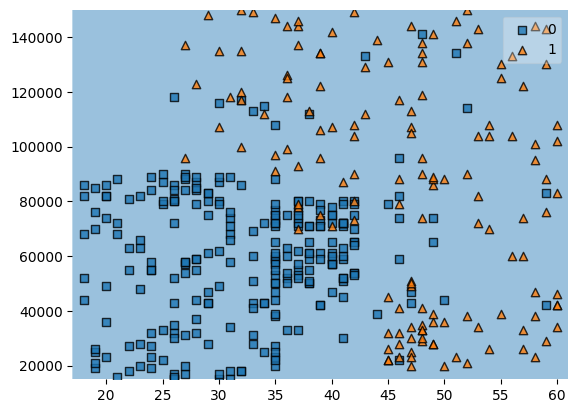

In [87]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)
plt.show()

### Logistic Regression (Binary Classification - Polynomial input)

In [88]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
pf = PolynomialFeatures(degree =6)
pf.fit(x)
pf = pd.DataFrame(pf.transform(x))

In [90]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

In [91]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [92]:
lr.score(x_test,y_test)

0.65

### Logistic Regression (Multi Classification)

In [93]:
df = pd.read_csv(r"C:\Users\User\Desktop\study material\projects\datasets\ML ALGO PROJECTS\iris\iris.csv")
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [94]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


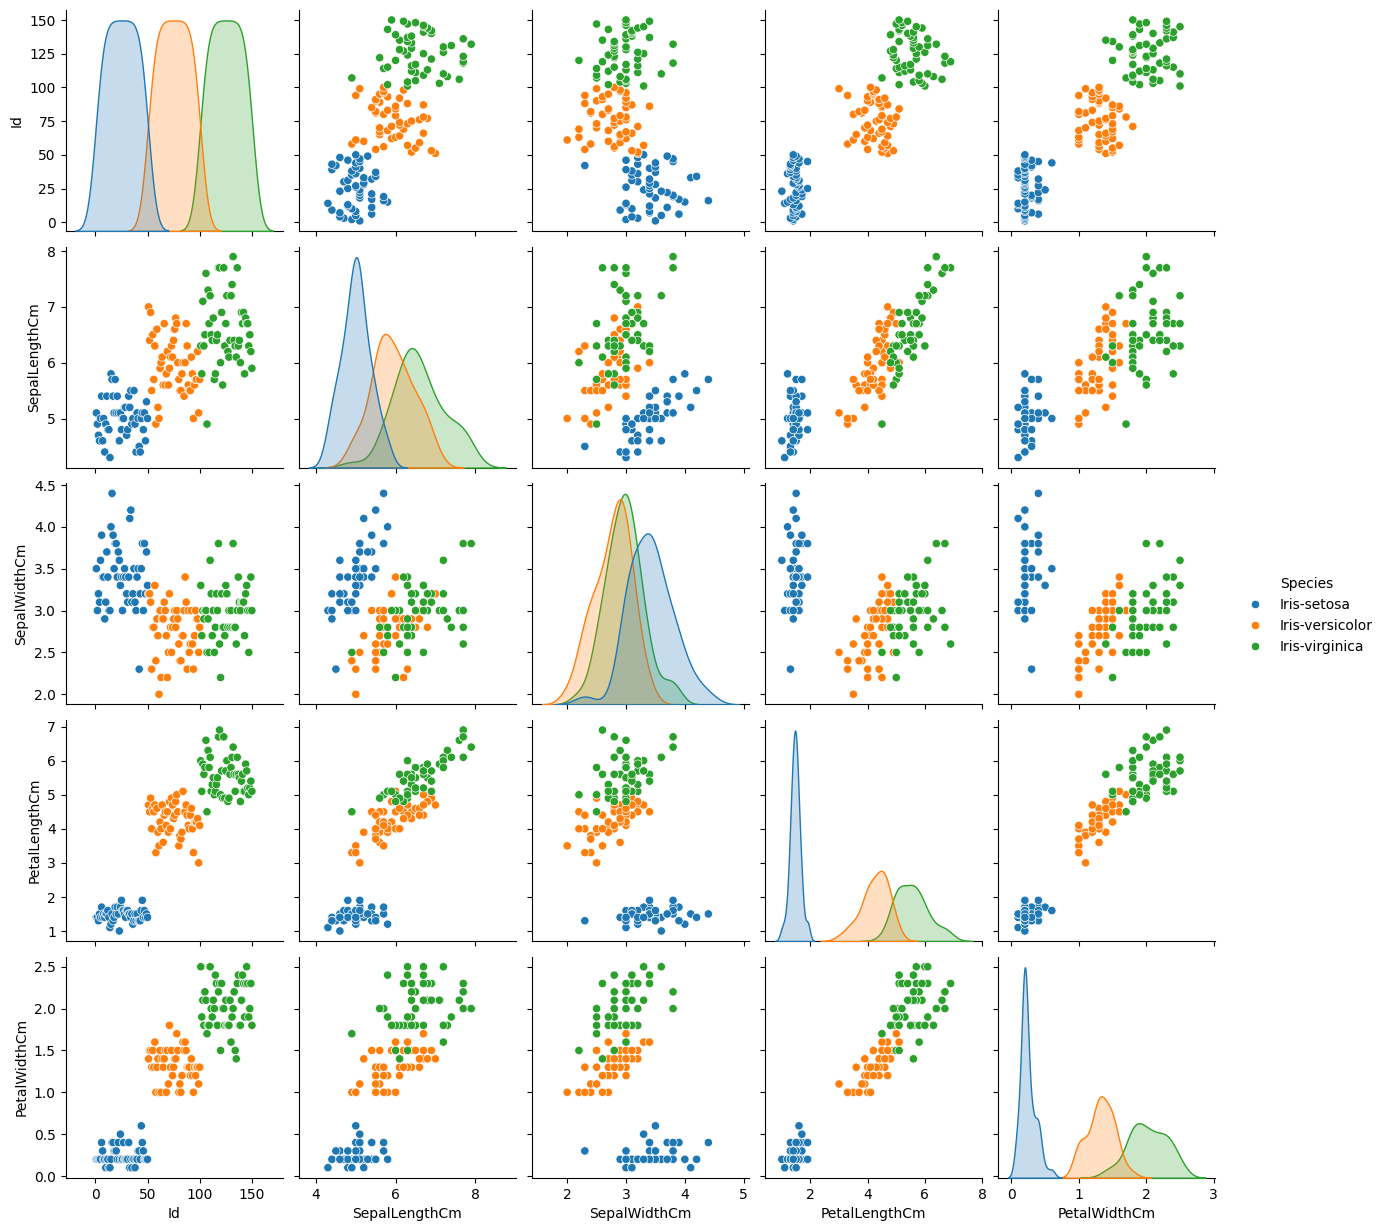

In [95]:
sns.pairplot(data=df , hue="Species")
plt.show()

In [96]:
x = df.iloc[:,:-1]
y = df["Species"]

In [97]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

#### OVR Function and multinomial function

In [98]:
lr = LogisticRegression(multi_class="ovr")
lr.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [99]:
lr.score(x_test,y_test)

1.0

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
model = LogisticRegression(max_iter=1000)
pipeline = make_pipeline(scaler, model)

pipeline.fit(x_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [101]:
lr.score(x_test,y_test)

1.0

## Confusion Matrix

In [102]:
df = pd.read_csv(r"C:\Users\User\Desktop\study material\projects\datasets\ML ALGO PROJECTS\diabetes dataset\diabetes.csv")

In [103]:
x = df.iloc[:,:-1]
y = df["Outcome"]

In [104]:
x_train , x_test , y_train , y_test =  train_test_split(x,y,test_size=0.2, random_state = 42)

In [105]:
lr = LogisticRegression()
lr.fit(x_train , y_train)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
lr.score(x_test,y_test)

0.7467532467532467

In [107]:
from sklearn.metrics import confusion_matrix , precision_score , recall_score , f1_score

In [108]:
cf = confusion_matrix(y_test, lr.predict(x_test))

<Axes: >

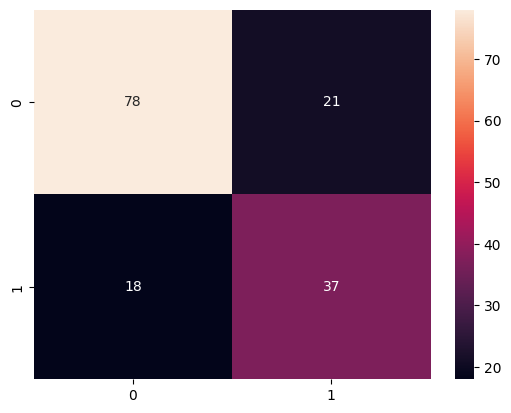

In [109]:
sns.heatmap(cf , annot = True)

In [110]:
precision_score(y_test, lr.predict(x_test))

0.6379310344827587

In [111]:
recall_score(y_test, lr.predict(x_test))

0.6727272727272727

In [112]:
f1_score(y_test, lr.predict(x_test))

0.6548672566371682

### OVER SAMPLING AND UNDER SAMPLING

In [113]:
df = pd.read_csv(r"C:\Users\User\Desktop\study material\projects\datasets\ML ALGO PROJECTS\social.csv")
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [114]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [115]:
x =  df[["Age","EstimatedSalary"]]
y = df["Purchased"]

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [117]:
x_train , x_test , y_train , y_test =  train_test_split(x,y,test_size=0.2, random_state = 42)

In [118]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [119]:
lr.score(x_test,y_test)

0.65

In [120]:
lr.predict([[45,26000]])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

#### Under Sampling

In [121]:
from imblearn.under_sampling import RandomUnderSampler

In [122]:
ru = RandomUnderSampler()
ru_x , ru_y = ru.fit_resample(x,y)


In [123]:
ru_y.value_counts()

Purchased
0    143
1    143
Name: count, dtype: int64

In [124]:
x_train , x_test , y_train , y_test =  train_test_split(ru_x,ru_y,test_size=0.2, random_state = 42)

In [125]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [126]:
lr.score(x_test,y_test)

0.5862068965517241

In [127]:
lr.predict([[45,26000]])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

#### over sampler does the same thing just add more value to the lesser valued category

## Naive Bayes Algorithm

In [128]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [129]:
x =  df[["Age","EstimatedSalary"]]
y = df["Purchased"]

In [130]:
x_train , x_test , y_train , y_test =  train_test_split(x,y,test_size=0.2, random_state = 42)

In [131]:
from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB

In [132]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [133]:
gnb.score(x_test,y_test)

0.925

In [134]:
gnb.predict([[19,19000]])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [135]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [136]:
mnb.score(x_test,y_test)

0.6

In [137]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [138]:
bnb.score(x_test,y_test)

0.65

## Decision Tree

In [139]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [140]:
x =  df[["Age","EstimatedSalary"]]
y = df["Purchased"]

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
sc = StandardScaler()
sc.fit(x,y)
x= pd.DataFrame(sc.transform(x), columns=x.columns)

In [143]:
x_train , x_test , y_train , y_test =  train_test_split(x,y,test_size=0.2, random_state = 42)

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
dt =  DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [146]:
dt.score(x_test,y_test)

0.9

In [147]:
dt.predict([[19,19000]])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [148]:
from sklearn.tree import plot_tree

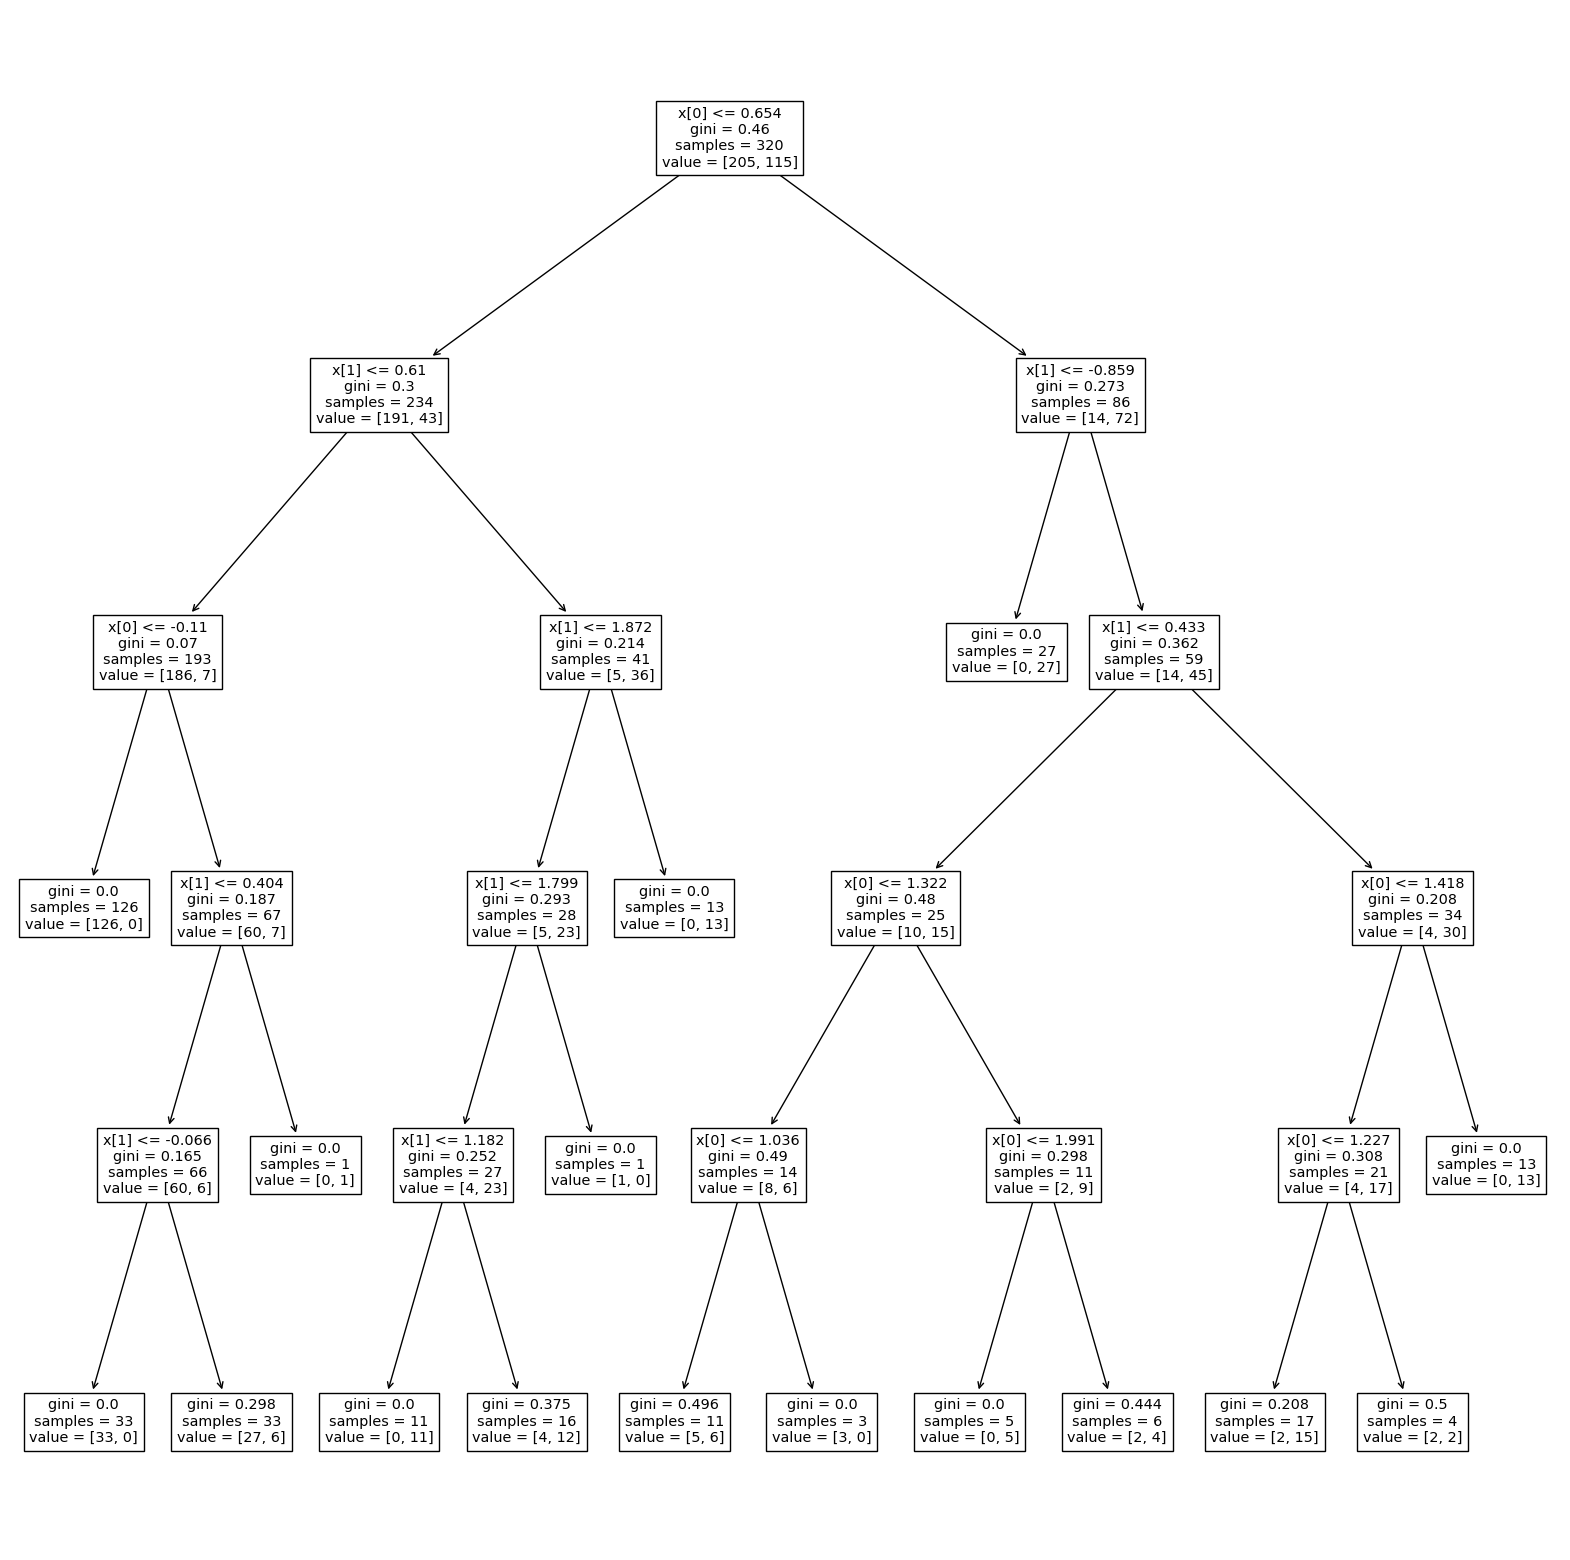

In [149]:
plt.figure(figsize=(20,20))
plot_tree(dt)
plt.show()


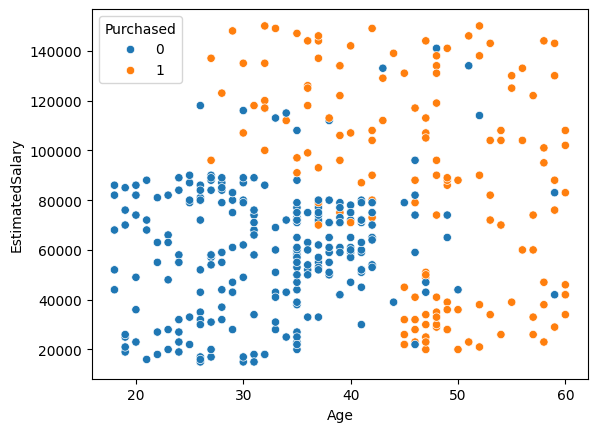

In [150]:
sns.scatterplot(x= "Age", y= "EstimatedSalary" , hue = "Purchased", data=df)
plt.show()

### Pruning

In [151]:
print(dt.score(x_test,y_test))   
print(dt.score(x_train,y_train))

0.9
0.934375


#### Data is overfitted       use max_depth to remove overfitting called as pre-pruning

In [152]:
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train),dt2.score(x_test,y_test),i) 

0.821875 0.9 1
0.91875 0.9125 2
0.91875 0.9125 3
0.93125 0.9125 4
0.934375 0.9 5
0.95 0.8625 6
0.96875 0.85 7
0.971875 0.85 8
0.98125 0.85 9
0.984375 0.85 10
0.990625 0.8375 11
0.99375 0.8375 12
0.99375 0.8375 13
0.996875 0.8375 14
0.996875 0.8375 15
0.996875 0.8375 16
0.996875 0.8375 17
0.996875 0.8375 18
0.996875 0.8375 19


#### Data is overfitted       the above step is called post pruning

#### Decision Tree Regression 

In [153]:
dj.head(5)

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


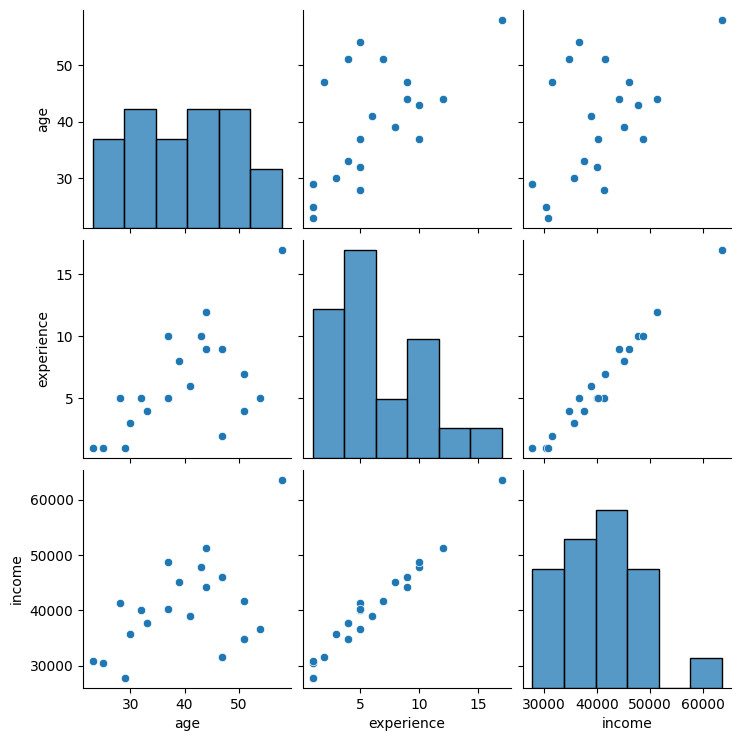

In [154]:
sns.pairplot(data=dj)
plt.show()

In [155]:
x = dj.iloc[:,:-1]
y = dj["income"]

In [156]:
x_train , x_test , y_train , y_test =  train_test_split(x,y,test_size=0.2, random_state = 42)

In [157]:
from sklearn.tree import DecisionTreeRegressor

In [158]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)


DecisionTreeRegressor()

In [159]:
dt.score(x_test,y_test)

0.29782687463379354

## K Nearest Neighbour Classification/ Regression

#### Classification

In [160]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [161]:
x =  df[["Age","EstimatedSalary"]]
y = df["Purchased"]

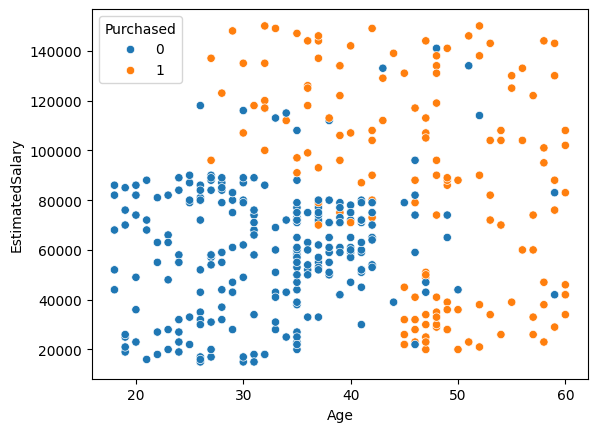

In [162]:
sns.scatterplot(x="Age", y="EstimatedSalary", hue="Purchased", data =df)
plt.show()

In [163]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [164]:
x_train , x_test , y_train , y_test =  train_test_split(x,y,test_size=0.2, random_state = 42)

In [165]:
from sklearn.neighbors import KNeighborsClassifier

In [173]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [174]:
knn.score(x_test,y_test)

0.9125

In [175]:
knn.score(x_train,y_train)

0.925

In [178]:
knn.predict([[1,1000]])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


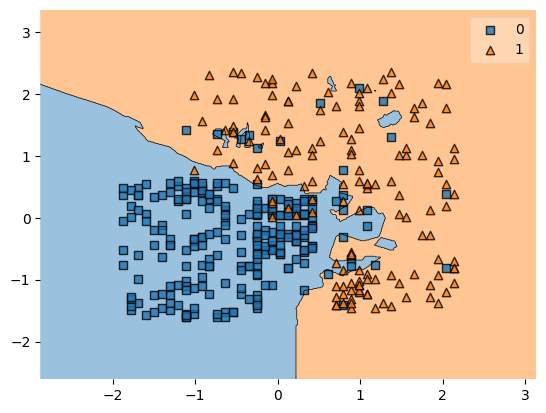

In [179]:
plot_decision_regions(x.to_numpy(), y.to_numpy(),clf=knn)
plt.show()

## Support Vector machine

In [180]:
df = pd.read_csv(r"C:\Users\User\Desktop\study material\projects\datasets\ML ALGO PROJECTS\diabetes dataset\diabetes.csv")
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [181]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


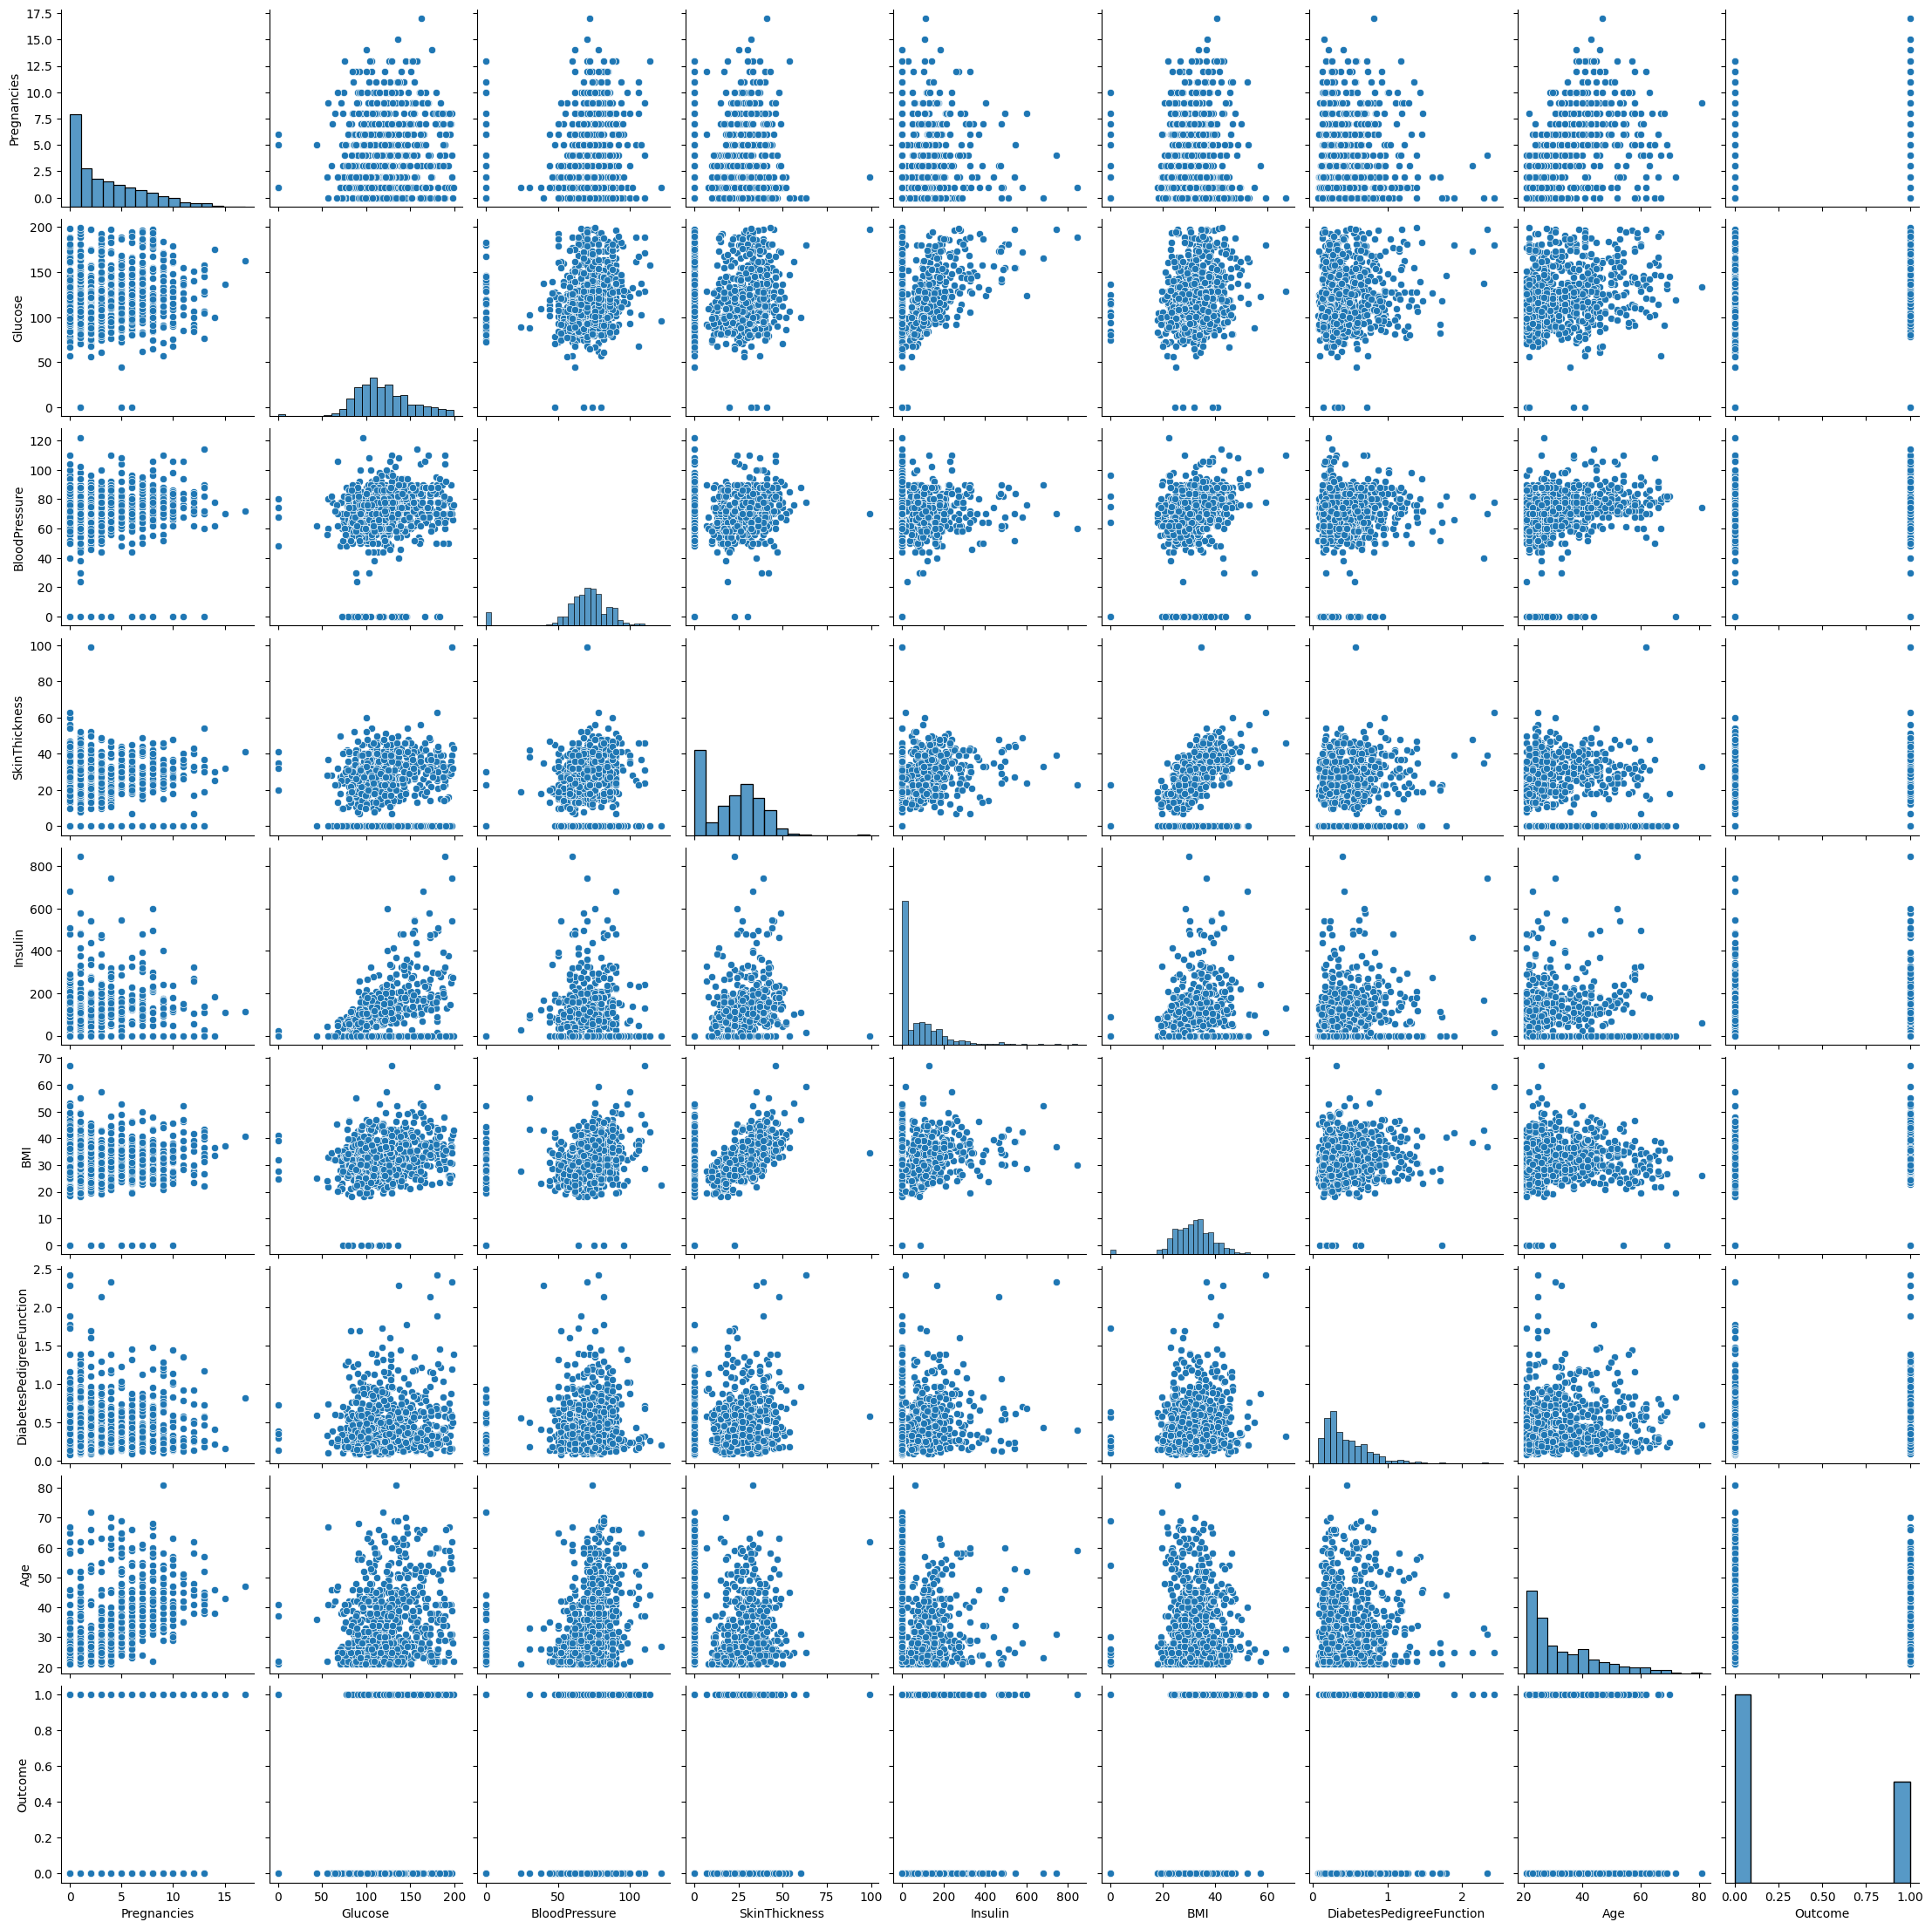

In [204]:
sns.pairplot(data =df )
plt.show()

In [183]:
x = df.iloc[:,:-1]
y = df["Outcome"]

In [184]:
x_train , x_test , y_train , y_test =  train_test_split(x,y,test_size=0.2, random_state = 42)

In [185]:
from sklearn.svm import SVR

In [199]:
sv = SVR(kernel="linear")
sv.fit(x_train,y_train)

SVR(kernel='linear')

In [201]:
sv.score(x_test,y_test)

0.24289527122034593

#### Classification

In [188]:
from sklearn.svm import SVC

In [202]:
svc = SVC(kernel="poly")
svc.fit(x_train,y_train)

SVC(kernel='poly')

In [203]:
svc.score(x_test,y_test)

0.7597402597402597